<a href="https://colab.research.google.com/github/gmazzitelli/be-a-citizen-scientist/blob/master/BeACitizenScientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GET data from URL
Carica il file del questionario dalla URL (shared readeable file)
buona refence [link text](https://michaelsaruggia.com/python-per-data-science-pandas/)

In [0]:
import numpy as np
import pandas as pd
url_csv_file = "https://docs.google.com/spreadsheet/ccc?key=19zCRezCS3yIy6_Igzex2sotnNja2Ks57RonGX8W2R8I&output=csv"
df = pd.read_csv(url_csv_file).replace(np.nan, 'Nessuna risposta', regex=True)


qualche aggiustamento dei dati per distinguere grandi da piccoli e togliere sotituire un domanda con la virgala che la fa comparire come multiple choiche

In [0]:
df = df.replace({'Età in anni compiuti', '75 e oltre'}, {'Età in anni compiuti', 'tra 75 e oltre'} )
from sklearn.preprocessing import OrdinalEncoder
df['young'] = np.where(df['Età in anni compiuti']<'tra 25 e 34', 1, 0)
df['Sai quali pericoli potrebbero esserci nel postare le foto sui social?']=df['Sai quali pericoli potrebbero esserci nel postare le foto sui social?'].apply(
    lambda x: 'lo so - ma non mi interessa' if x == 'lo so, ma non mi interessa' else x)
young=df[df.young==1].copy()
adults =df[df.young==0].copy()
df.head()

# dataset visualization

visualizza tutti dati in modo basico differenziando fra grandi e piccoli

tra 15 e 17       383
tra 11 e 14       209
tra 45 e 54       153
tra 18 e 19       120
tra 55 e 64        49
tra 35 e 44        46
tra 25 e 34        36
tra 20 e 24        17
tra 65 e 74         6
tra 75 e oltre      4
Name: Età in anni compiuti, dtype: int64


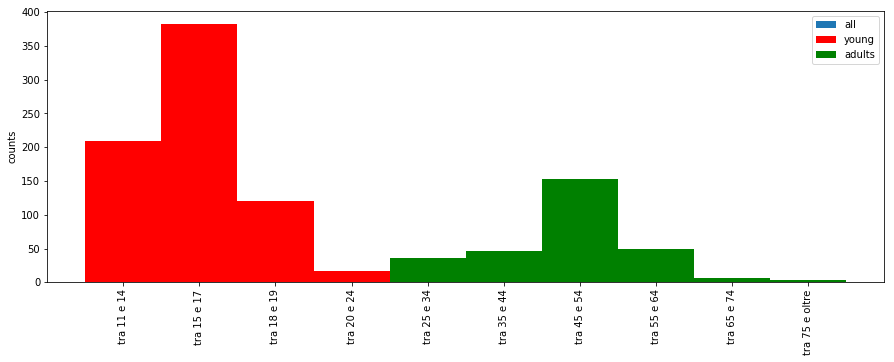

F    647
M    376
Name: Sesso, dtype: int64


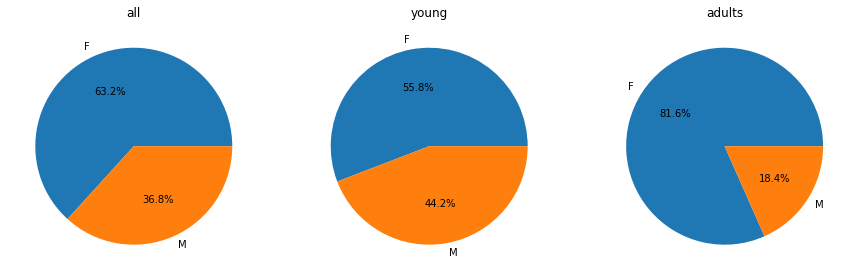

italiana    985
europea      22
altra        16
Name: Cittadinanza, dtype: int64


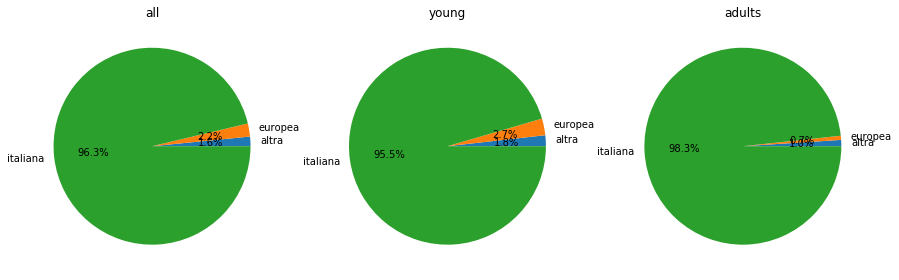

Sì                  959
Nessuna risposta     40
No                   24
Name: Sei nato in Italia?, dtype: int64


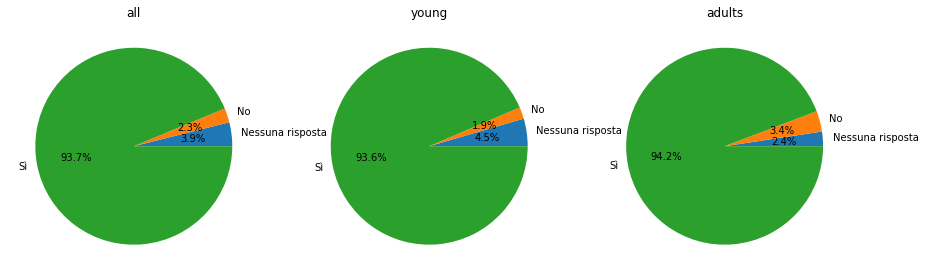

Roma                510
Varese              169
Perugia              78
Nessuna risposta     62
Foggia               26
Milano               21
Napoli               13
Como                 11
Cosenza               9
Genova                9
Salerno               9
Bari                  7
Reggio Calabria       6
Palermo               5
Monza Brianza         5
Brindisi              4
Ancona                4
Latina                3
Potenza               3
Novara                3
Torino                3
Caserta               3
Catanzaro             3
L'Aquila              3
Bologna               3
Agrigento             3
Trieste               2
Lecce                 2
Verona                2
Trento                2
                   ... 
Siena                 2
Vicenza               2
Taranto               2
Frosinone             2
Benevento             1
Savona                1
Viterbo               1
Rieti                 1
Ascoli Piceno         1
Arezzo                1
Cremona         

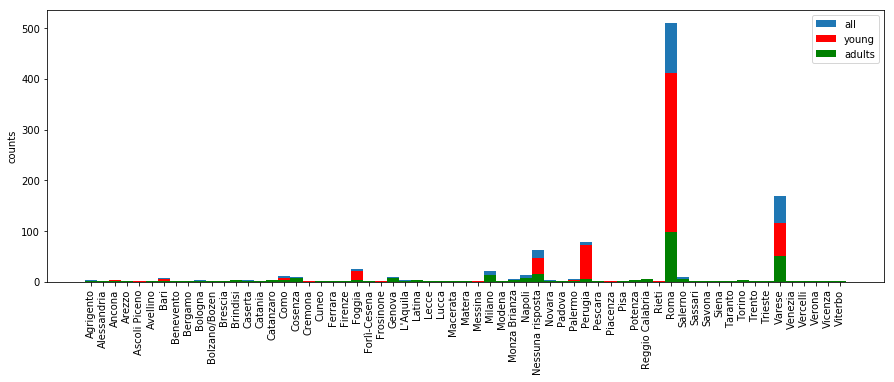

Roma                     625
Varese                   191
Perugia                   84
Como                      25
Foggia                    23
Genova                    11
Cosenza                    6
Ancona                     5
Milano                     4
Barletta-Andria-Trani      3
Latina                     3
Palermo                    3
Bologna                    3
Bari                       3
Agrigento                  2
Vercelli                   2
Trieste                    2
Firenze                    2
Ferrara                    2
Alessandria                2
Siena                      2
Monza e della Brianza      2
Savona                     1
Torino                     1
Brescia                    1
Padova                     1
Fermo                      1
Rieti                      1
Arezzo                     1
Potenza                    1
Cremona                    1
Bergamo                    1
Lecce                      1
Cuneo                      1
Pordenone     

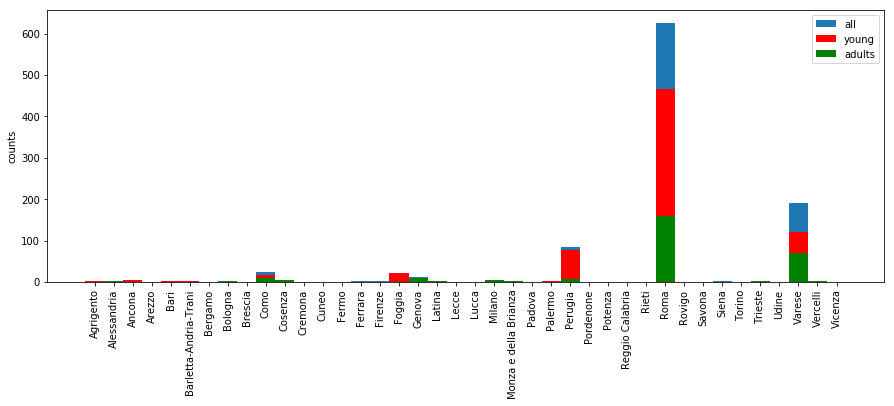

licenza di scuola secondaria di primo grado                                                                       581
laurea vecchio ordinamento                                                                                        118
scuola primaria                                                                                                   116
diploma di istituto tecnico                                                                                        54
licenza liceale                                                                                                    46
laurea magistrale biennale                                                                                         29
dottorato                                                                                                          22
laurea di primo livello                                                                                            19
diploma di istituto professionale                       

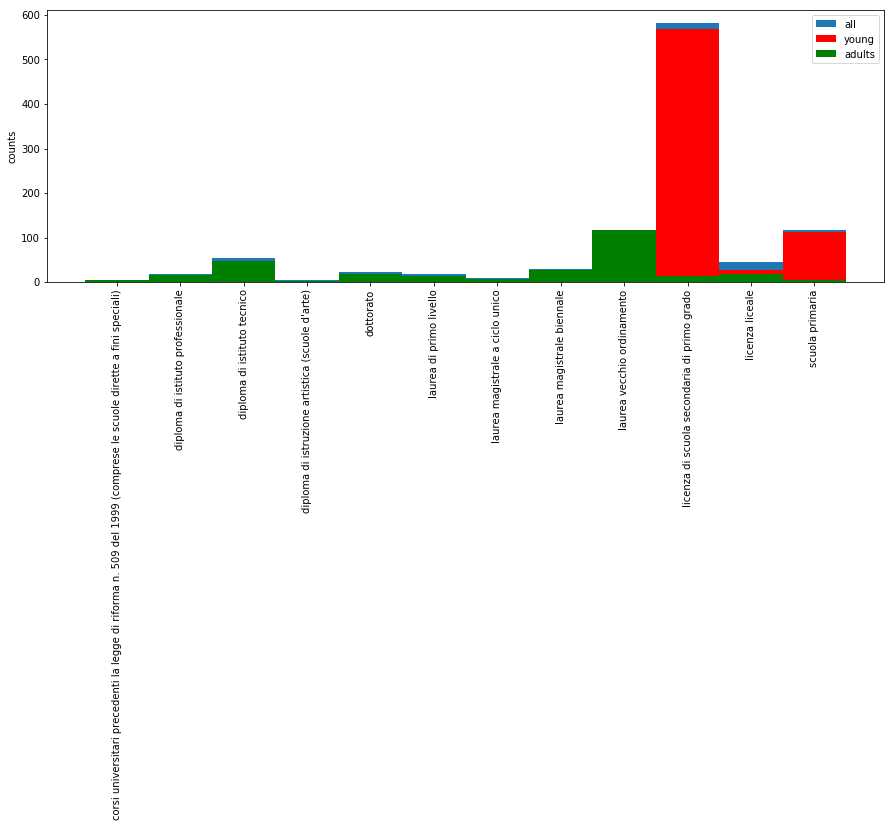

italiana    954
europea      36
altra        33
Name: Cittadinanza del padre, dtype: int64


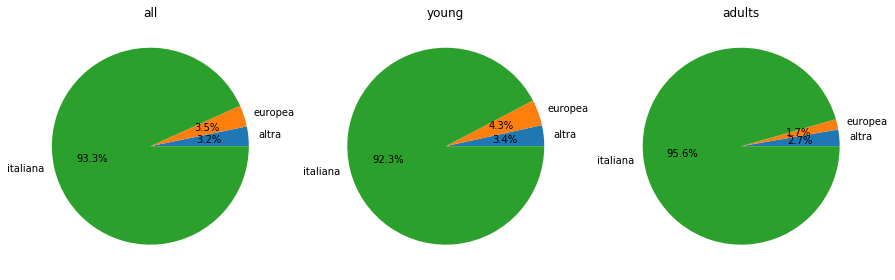

Sì                  923
Nessuna risposta     71
No                   29
Name: Tuo padre è nato in Italia?, dtype: int64


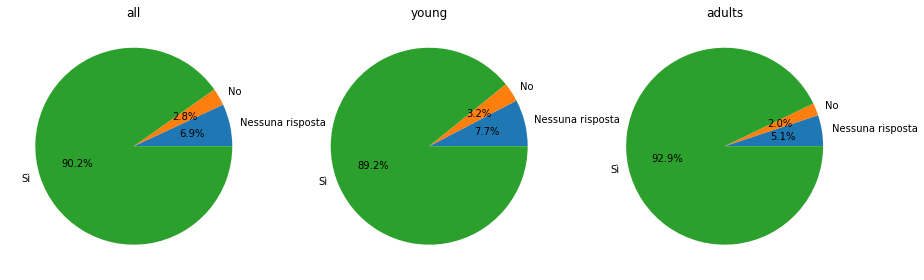

Roma                     344
Varese                   125
Nessuna risposta          98
Perugia                   65
Napoli                    34
Foggia                    27
Milano                    24
Reggio Calabria           14
Salerno                   12
Palermo                   11
Frosinone                 11
Cosenza                   10
Como                      10
Catanzaro                  9
L'Aquila                   9
Taranto                    8
Messina                    8
Caserta                    8
Avellino                   8
Bari                       8
Latina                     7
Genova                     7
Lecce                      6
Potenza                    6
Terni                      6
Campobasso                 6
Catania                    5
Siracusa                   5
Benevento                  5
Trieste                    5
                        ... 
Barletta-Andria-Trani      2
Mantova                    2
Parma                      2
Trento        

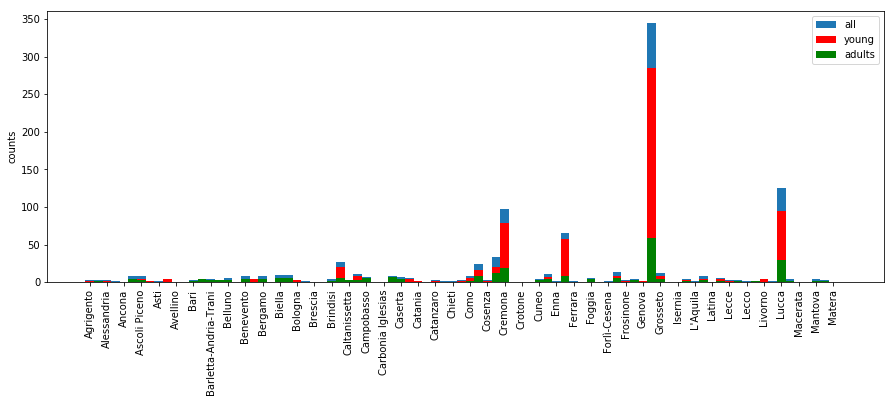

italiana    944
europea      43
altra        36
Name: Cittadinanza della madre, dtype: int64


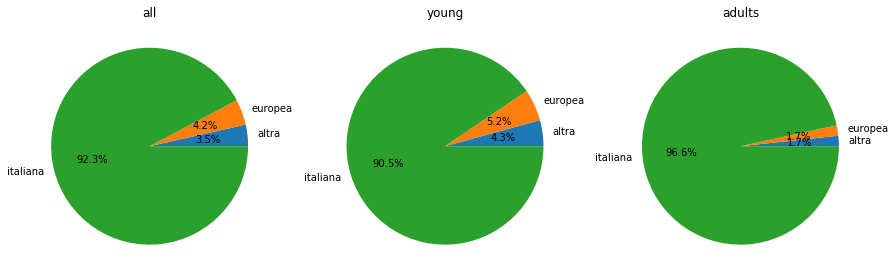

Sì                  906
Nessuna risposta     81
No                   36
Name: Tua madre è nata in Italia?, dtype: int64


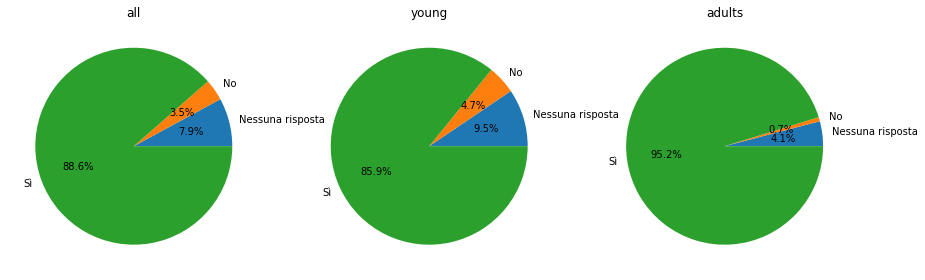

Roma                     345
Varese                   125
Nessuna risposta         115
Perugia                   64
Napoli                    29
Milano                    26
Foggia                    26
Bari                      14
Cosenza                   12
Como                      11
Potenza                   10
L'Aquila                  10
Avellino                  10
Caserta                   10
Venezia                    9
Reggio Calabria            9
Salerno                    9
Frosinone                  8
Catanzaro                  8
Palermo                    8
Genova                     7
Lecce                      7
Padova                     6
Ancona                     6
Cagliari                   5
Agrigento                  5
Brindisi                   5
Matera                     4
Ferrara                    4
Forlì-Cesena               4
                        ... 
Crotone                    2
Monza e della Brianza      2
Rieti                      2
Mantova       

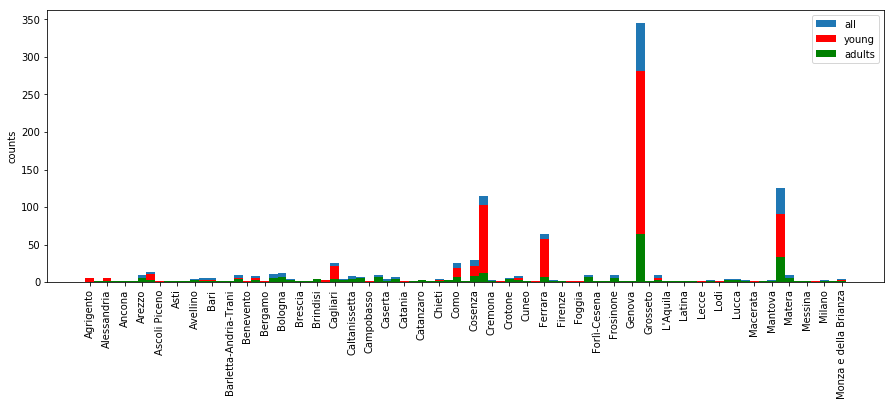

Sì    993
No     30
Name: Negli ultimi 12 mesi ti è mai capitato di cercare informazioni?, dtype: int64


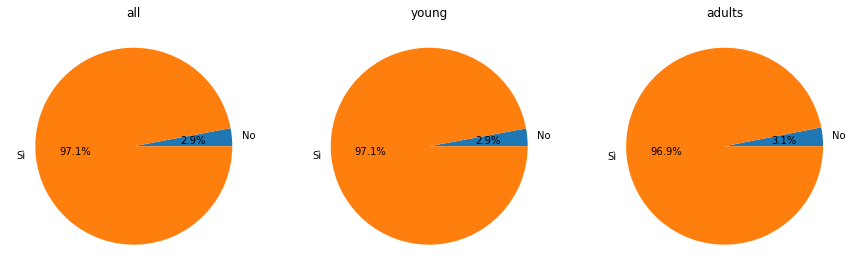

Tutti i giorni                   548
Più di due volte a settimana     327
Meno di due volte a settimana     94
Nessuna risposta                  30
Meno di una volta al mese         24
Name: Negli ultimi 12 mesi quante volte hai cercato informazioni?, dtype: int64


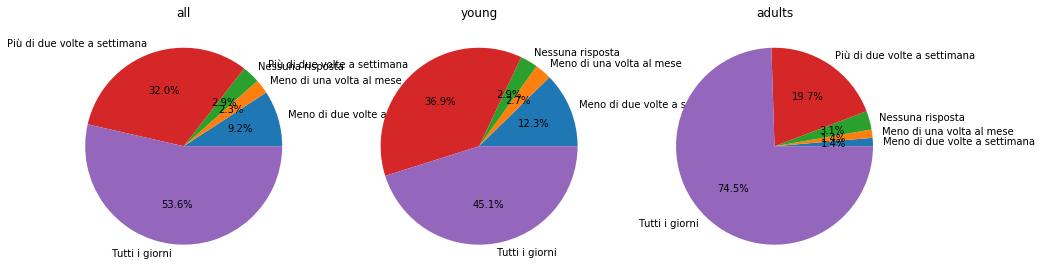

raramente                         522
mai                               257
spesso                            188
Nessuna risposta                   30
sempre                             19
mai, raramente                      2
mai, raramente, spesso, sempre      2
mai, spesso                         1
mai, raramente, spesso              1
raramente, spesso                   1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Carta (es. giornali, riviste, ecc.)], dtype: int64


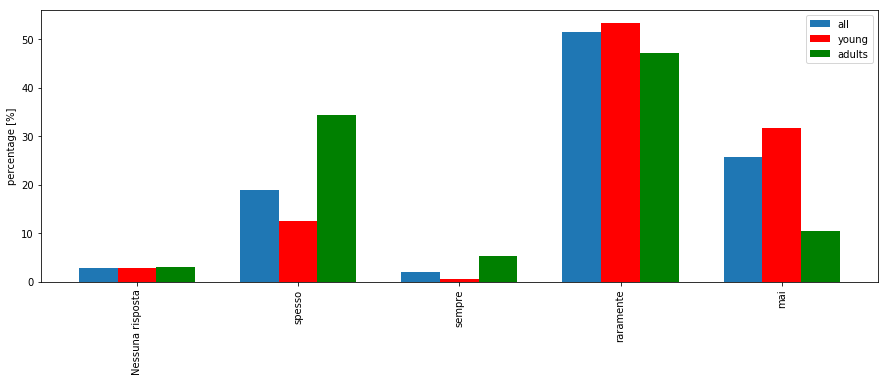

spesso                            464
raramente                         327
mai                               108
sempre                             85
Nessuna risposta                   30
raramente, spesso                   3
spesso, sempre                      2
mai, raramente, spesso, sempre      2
mai, spesso                         1
mai, raramente, spesso              1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Tv (es. telegiornali, talkshow)], dtype: int64


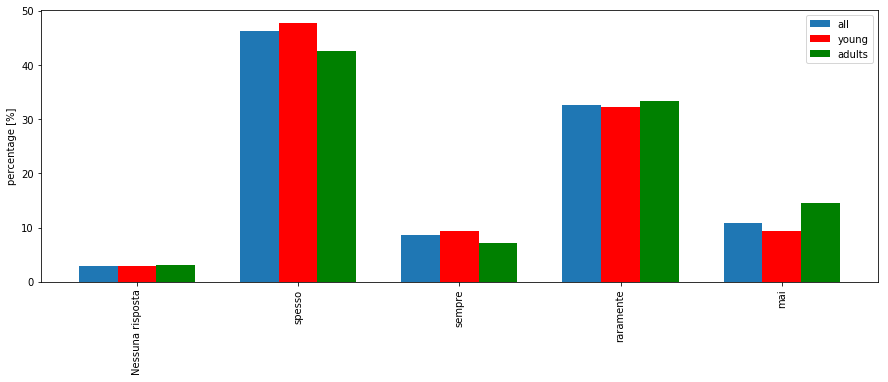

raramente                         395
mai                               341
spesso                            210
sempre                             36
Nessuna risposta                   30
mai, raramente                      6
mai, raramente, spesso, sempre      2
spesso, sempre                      1
mai, raramente, spesso              1
raramente, spesso                   1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Radio (es. giornaleradio)], dtype: int64


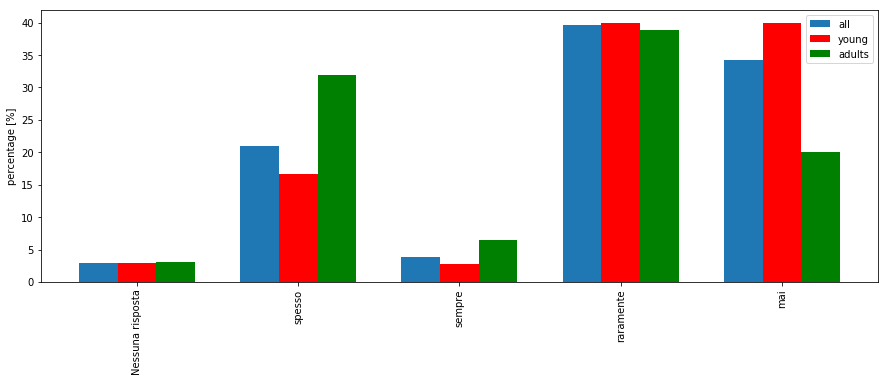

spesso                            564
raramente                         264
sempre                            118
mai                                31
Nessuna risposta                   30
raramente, spesso                   7
spesso, sempre                      3
mai, spesso                         2
mai, raramente, spesso, sempre      2
mai, raramente                      1
mai, raramente, spesso              1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Persone (amici, scuola, famiglia)], dtype: int64


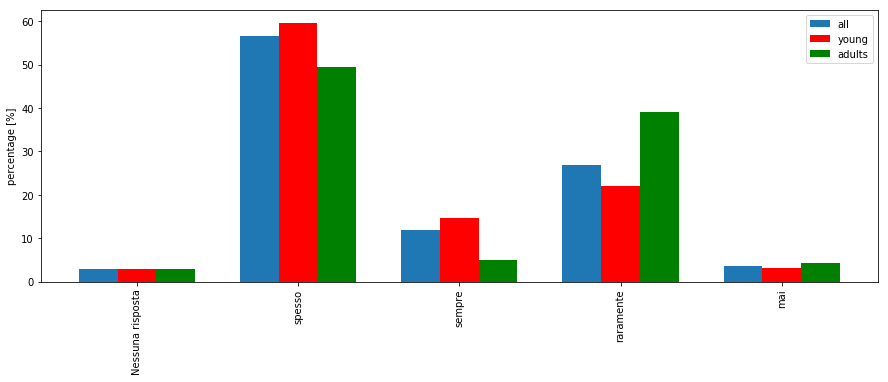

sempre                            624
spesso                            333
Nessuna risposta                   30
raramente                          19
mai                                 7
spesso, sempre                      4
mai, raramente, spesso, sempre      2
mai, raramente, spesso              1
mai, sempre                         1
mai, spesso                         1
mai, spesso, sempre                 1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Internet], dtype: int64


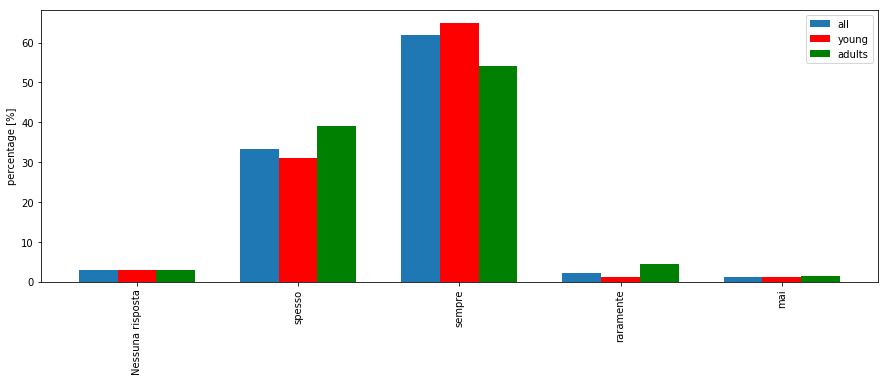

mai                               425
raramente                         376
spesso                            134
sempre                             41
Nessuna risposta                   30
mai, raramente                      7
raramente, spesso                   6
mai, raramente, spesso, sempre      2
mai, spesso                         1
mai, raramente, spesso              1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Altro], dtype: int64


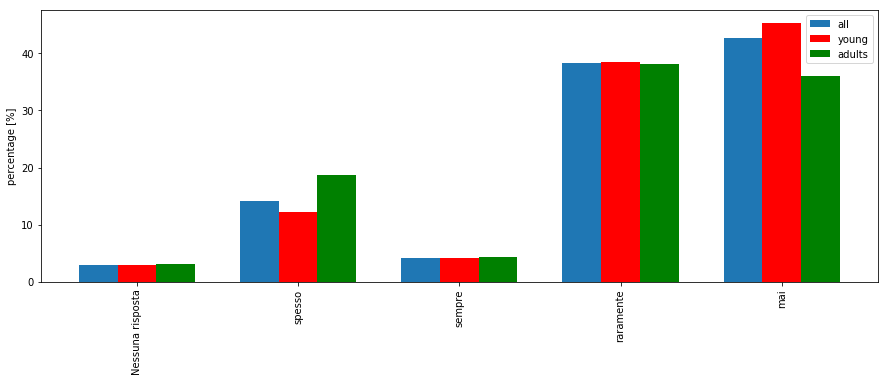

Internet            834
Carta                52
Persone              52
Tv                   35
Nessuna risposta     30
Altro                11
Radio                 9
Name: Tra gli strumenti che negli ultimi 12 mesi hai utilizzato per cercare informazioni, qual è quello che preferisci usare? , dtype: int64


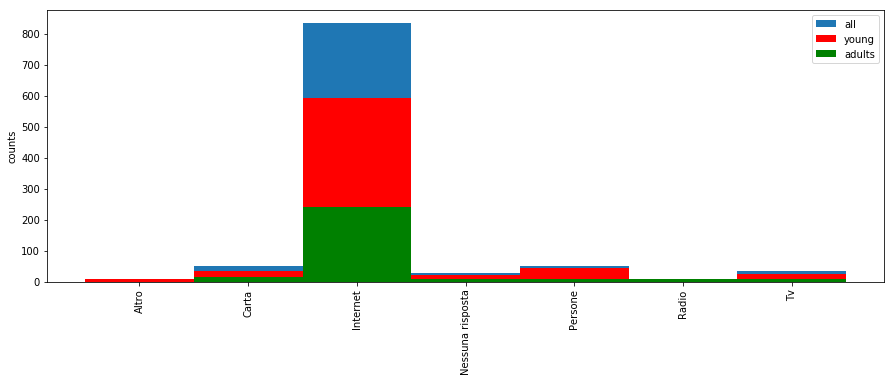

circa 30 minuti      434
meno di 10 minuti    317
circa 1 ora          160
più di un'ora         82
Nessuna risposta      30
Name: Negli ultimi 12 mesi, quando hai cercato notizie, quanto tempo hai impiegato mediamente al giorno nella ricerca?, dtype: int64


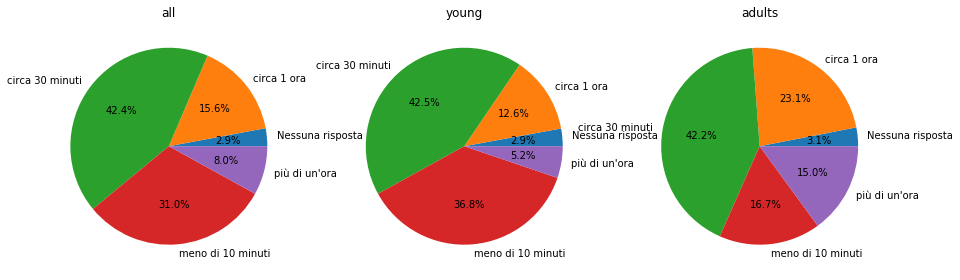

terrorismo, violenze e/o abusi sulle donne, violenze e/o abusi sui minori             154
altro                                                                                  84
catastrofi naturali                                                                    76
bullismo, violenze e/o abusi sulle donne, violenze e/o abusi sui minori                72
terrorismo, violenze e/o abusi sui minori, catastrofi naturali                         68
terrorismo                                                                             64
terrorismo, catastrofi naturali                                                        61
terrorismo, violenze e/o abusi sulle donne, catastrofi naturali                        60
violenze e/o abusi sulle donne, violenze e/o abusi sui minori, catastrofi naturali     51
violenze e/o abusi sulle donne, violenze e/o abusi sui minori                          41
violenze e/o abusi sui minori                                                          31
Nessuna ri

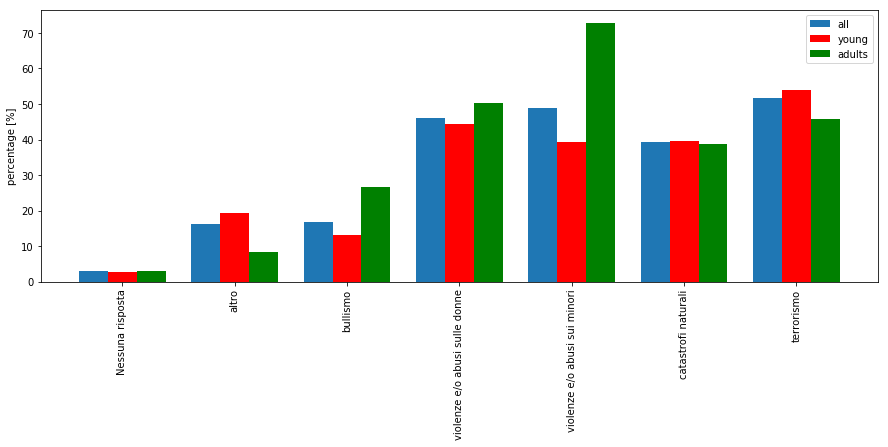

settimanalmente     382
mensilmente         275
giornalmente        172
praticamente mai    164
Nessuna risposta     30
Name: Con che frequenza ti informi su argomenti riguardanti la scienza?, dtype: int64


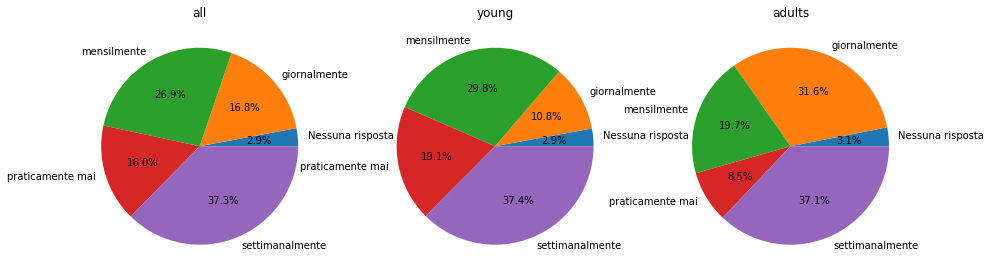

Nessuna risposta                                                   194
astronomia, curiosità scientifiche, tecnologia, innovazione         42
medicina, curiosità scientifiche, tecnologia, innovazione           39
medicina, ecologia/clima, tecnologia, innovazione                   39
ecologia/clima, curiosità scientifiche, tecnologia, innovazione     35
tecnologia, innovazione                                             22
medicina, ecologia/clima, curiosità scientifiche                    21
ecologia/clima, astronomia, tecnologia, innovazione                 20
ecologia/clima, astronomia, curiosità scientifiche                  19
medicina, curiosità scientifiche, biologia                          16
astronomia                                                          16
curiosità scientifiche                                              16
medicina                                                            15
ecologia/clima, curiosità scientifiche, biologia                    15
medici

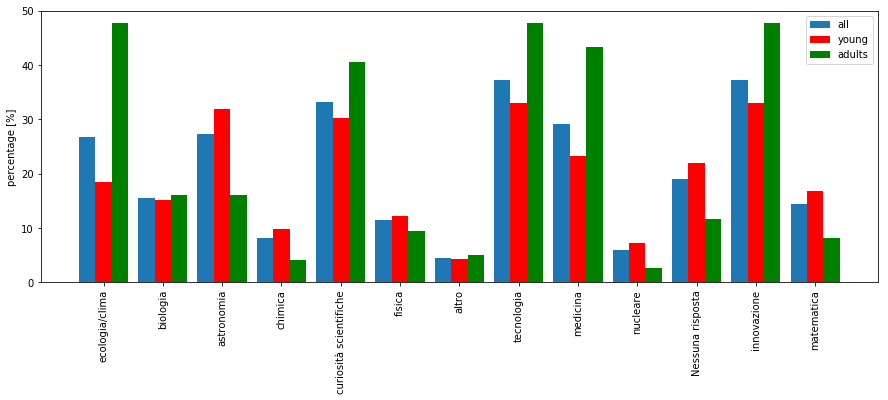

commenti e discussioni riguardo la notizia                                                                                                                                                                                                                       181
i video                                                                                                                                                                                                                                                          108
non so                                                                                                                                                                                                                                                            59
i titoli delle testate giornalistiche                                                                                                                                                                                    

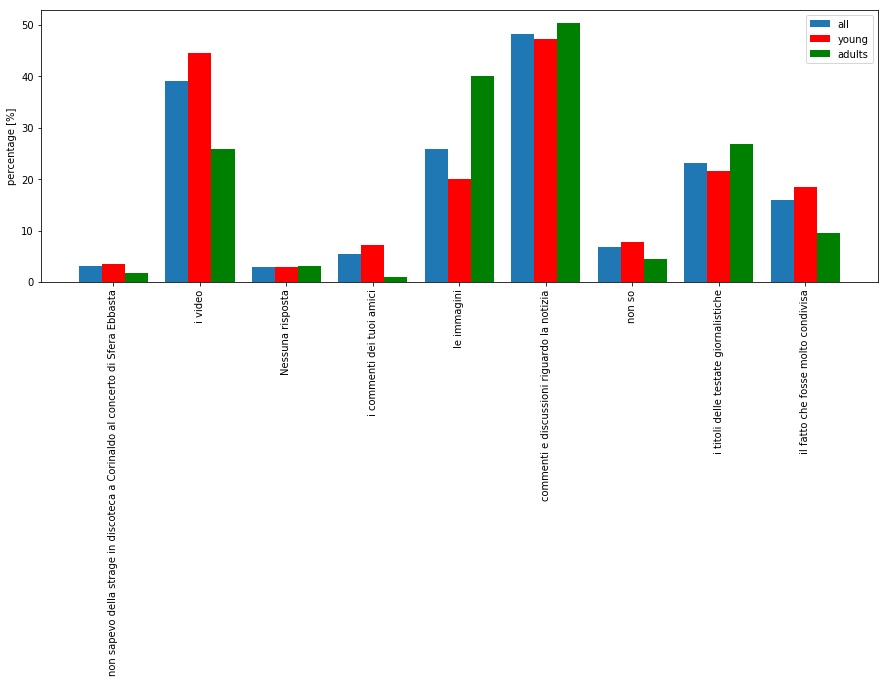

dalla tv                                                                                                                                                            544
da internet                                                                                                                                                          97
da internet, dalla tv                                                                                                                                                92
dalla tv, da una persona che ne parlava                                                                                                                              42
dalla radio                                                                                                                                                          41
da una persona che ne parlava                                                                                                                                   

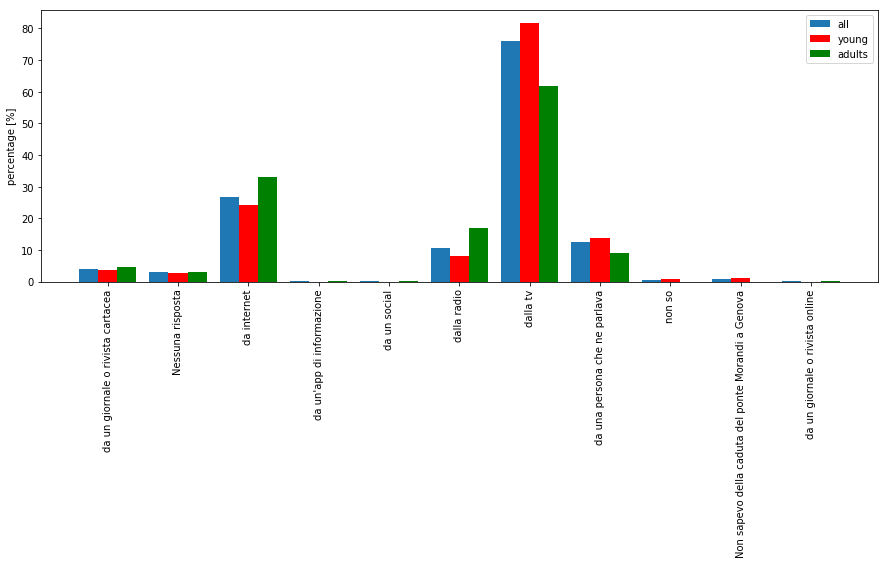

Sì                  982
Nessuna risposta     30
No                   11
Name: Hai mai usato internet?, dtype: int64


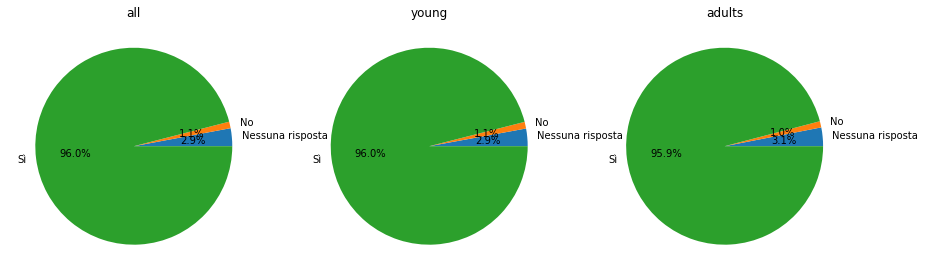

spesso                            431
raramente                         303
sempre                            142
mai                               109
Nessuna risposta                   31
mai, raramente                      2
mai, raramente, spesso, sempre      2
spesso, sempre                      1
raramente, spesso, sempre           1
mai, spesso                         1
Name: Sul web, dove prendi le informazioni? [testate giornalistiche online], dtype: int64


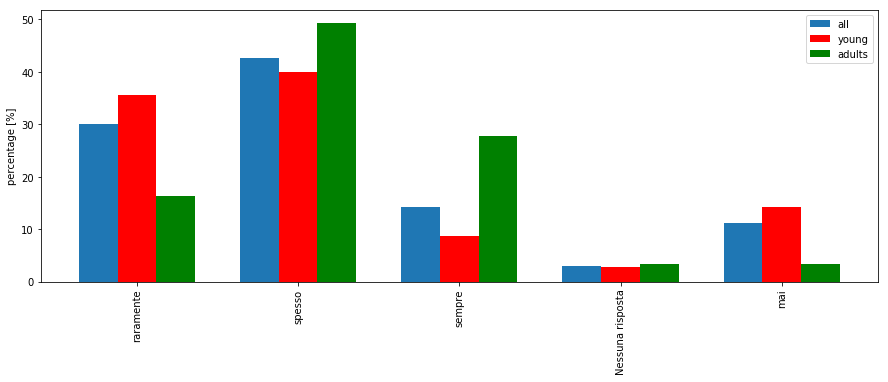

spesso                            395
raramente                         269
sempre                            178
mai                               141
Nessuna risposta                   31
spesso, sempre                      3
mai, raramente                      2
mai, raramente, spesso, sempre      2
raramente, spesso, sempre           1
raramente, spesso                   1
Name: Sul web, dove prendi le informazioni? [social], dtype: int64


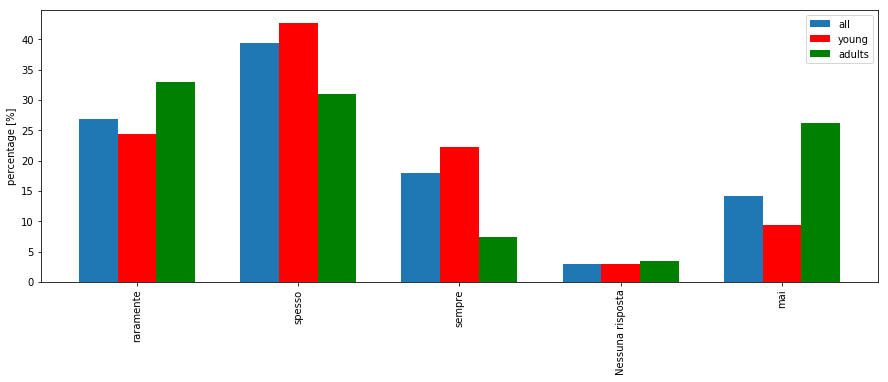

spesso                            459
sempre                            456
raramente                          49
Nessuna risposta                   31
mai                                18
spesso, sempre                      5
mai, raramente, spesso, sempre      2
raramente, sempre                   1
raramente, spesso, sempre           1
raramente, spesso                   1
Name: Sul web, dove prendi le informazioni? [motori di ricerca (es google, safari, ping], dtype: int64


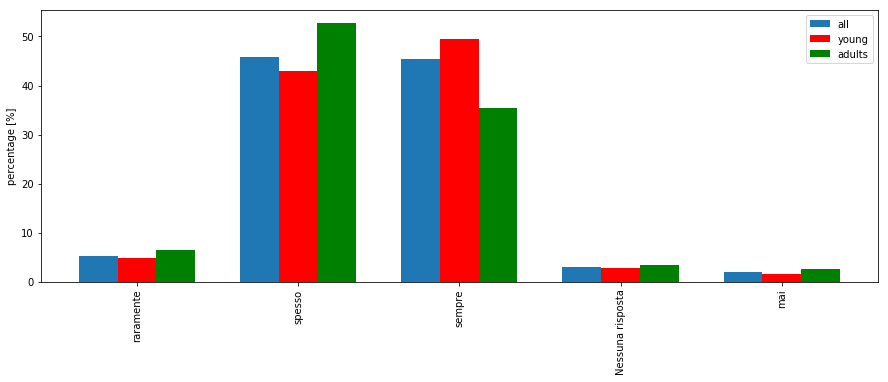

spesso                            389
raramente                         316
sempre                            147
mai                               132
Nessuna risposta                   31
spesso, sempre                      2
mai, raramente, spesso, sempre      2
mai, raramente                      1
mai, spesso                         1
raramente, spesso, sempre           1
raramente, spesso                   1
Name: Sul web, dove prendi le informazioni? [siti specifici che conosco], dtype: int64


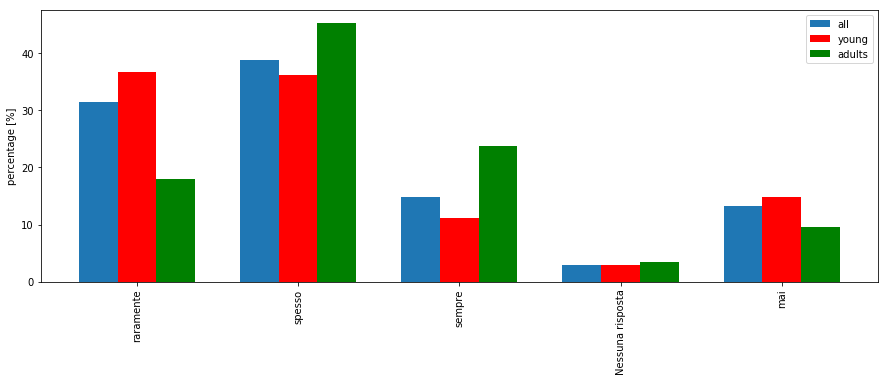

mai                               440
raramente                         326
spesso                            166
sempre                             46
Nessuna risposta                   31
mai, raramente                      8
mai, raramente, spesso, sempre      2
raramente, spesso                   1
mai, sempre                         1
raramente, spesso, sempre           1
mai, spesso                         1
Name: Sul web, dove prendi le informazioni? [app dedicate], dtype: int64


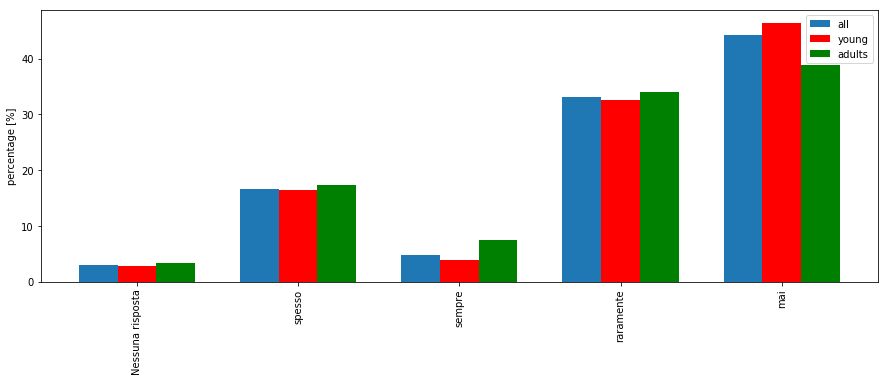

mai                               602
raramente                         247
spesso                            103
Nessuna risposta                   39
sempre                             23
mai, raramente                      5
raramente, spesso                   2
mai, raramente, spesso, sempre      2
Name: Sul web, dove prendi le informazioni? [newsletter via email], dtype: int64


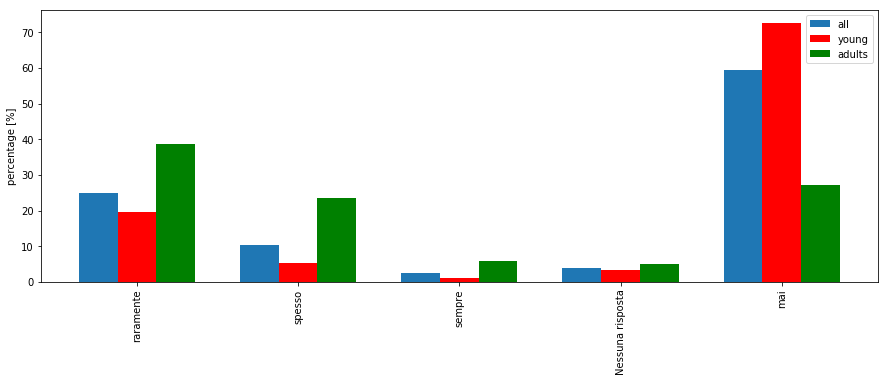

Instagram, Youtube                                                207
Altro                                                             109
Instagram                                                         104
Youtube                                                            72
Instagram, Youtube, Altro                                          61
Facebook                                                           58
Instagram, Facebook, Youtube                                       55
Facebook, Youtube                                                  44
Instagram, Facebook                                                43
Instagram, Altro                                                   34
Youtube, Altro                                                     32
Nessuna risposta                                                   31
Facebook, Youtube, Altro                                           12
Instagram, Facebook, Twitter                                       11
Instagram, Twitter, 

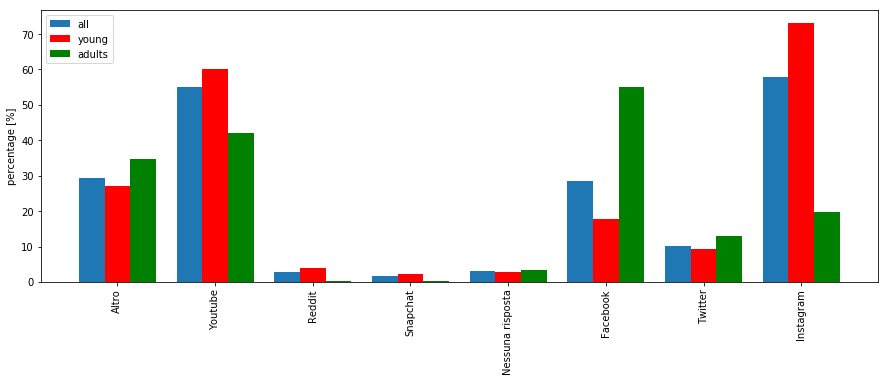

Instagram           403
Youtube             227
Facebook            154
Altro               154
Twitter              41
Nessuna risposta     31
Reddit               10
Snapchat              3
Name: Tra i social che usi di più anche per informati, quale preferisci?, dtype: int64


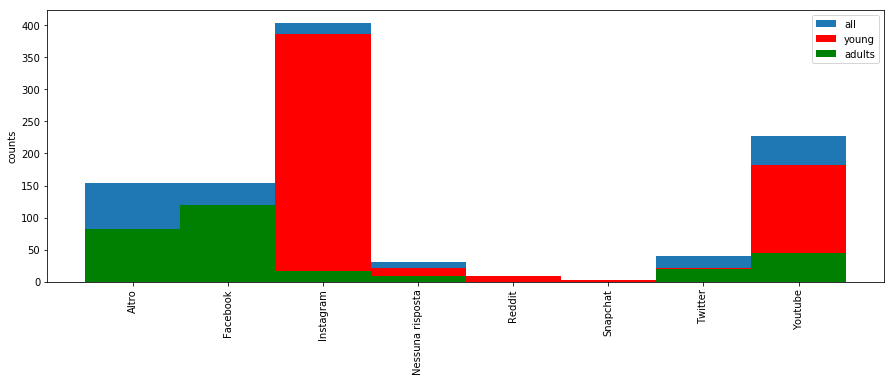

Nessuna risposta                                                                                                                                                                                          31
sport, film - serie tv, musica                                                                                                                                                                             9
altro                                                                                                                                                                                                      8
Notizie/cronaca/attualità, sport, scienza (scoperte scientifiche, innovazioni, approfondimenti), film - serie tv, musica                                                                                   7
gossip, shopping online, moda, film - serie tv, musica                                                                                                                              

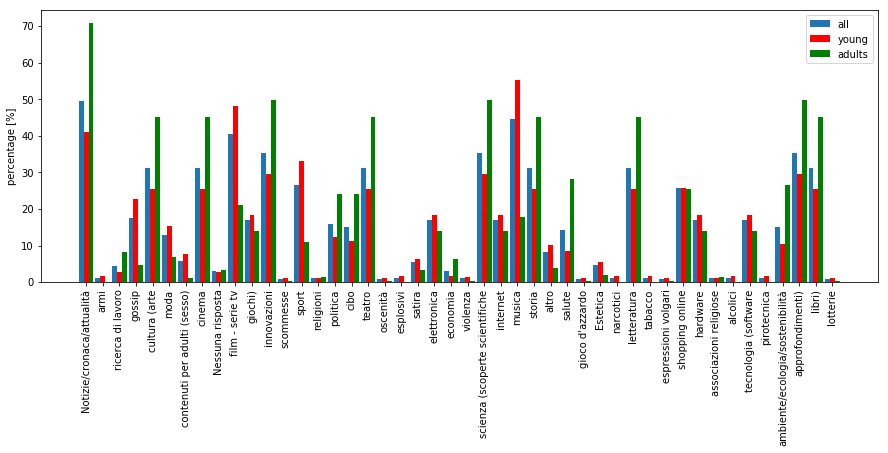

foto                271
news                229
memes               208
video               129
profili vari        118
Nessuna risposta     32
like/followers       28
classifiche           8
Name: Qual è la prima cosa che vai a vedere sui social?, dtype: int64


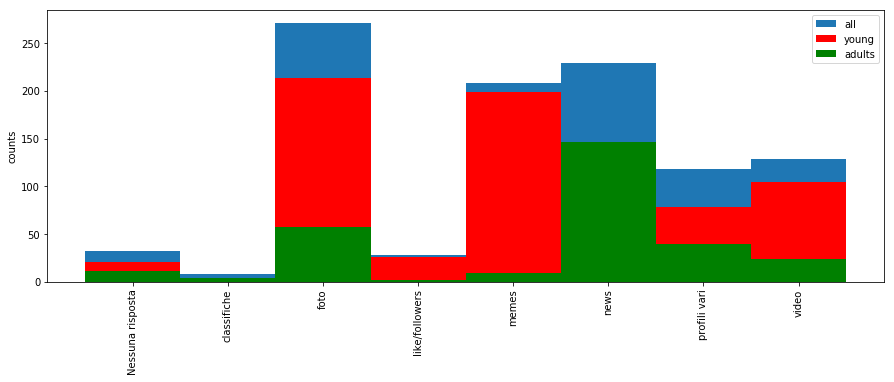

Da un motore di ricerca online (es google, bing, safari ...)                                                                                                                117
Non ne ricevo                                                                                                                                                               115
Da un'app di news (es google news, apple news...)                                                                                                                            90
Dalle Home dei social                                                                                                                                                        61
Dai video proposti su Youtube                                                                                                                                                39
Nessuna risposta                                                                                                        

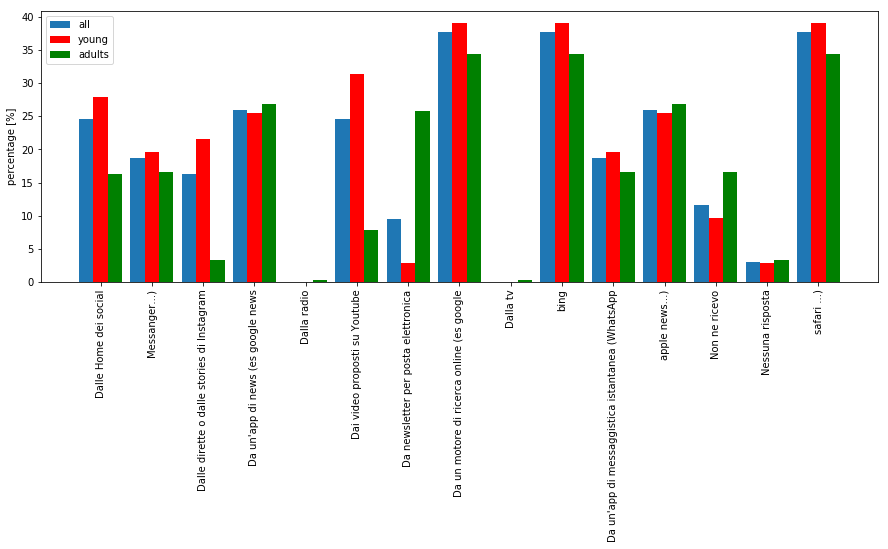

Nessuna risposta                                                                                                                                                                                              31
shopping online                                                                                                                                                                                               29
altro                                                                                                                                                                                                         28
Notizie/cronaca/attualità                                                                                                                                                                                     22
sport                                                                                                                                                               

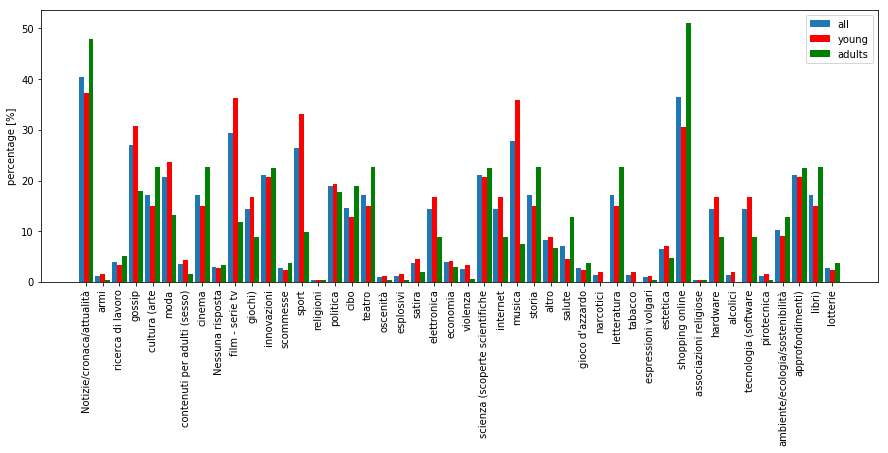

l'argomento che tratta                                                                                                                328
il titolo, l'argomento che tratta                                                                                                     149
il titolo                                                                                                                             108
il titolo, la grafica, l'argomento che tratta                                                                                          47
l'argomento che tratta, commenti e discussioni riguardo la notizia                                                                     41
la grafica, l'argomento che tratta                                                                                                     33
Nessuna risposta                                                                                                                       31
il titolo, la grafica             

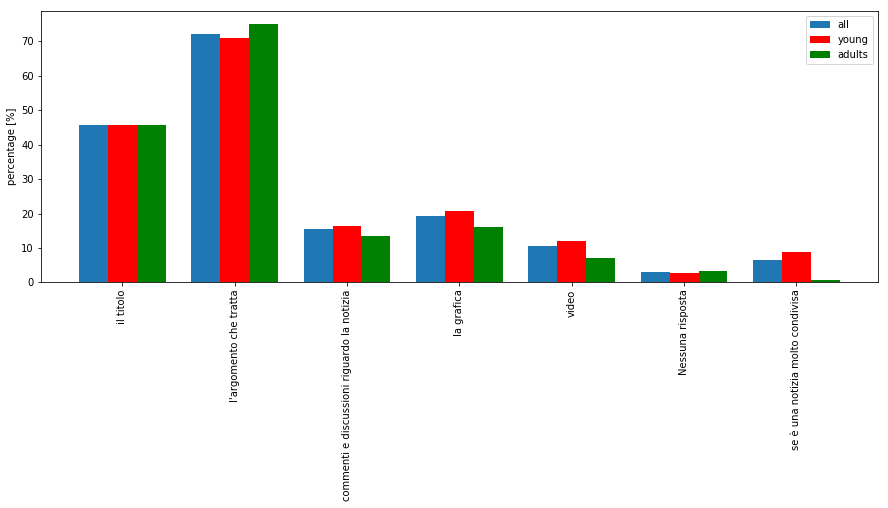

raramente           471
spesso              316
mai                 170
sempre               35
Nessuna risposta     31
Name: Condividi le notizie?, dtype: int64


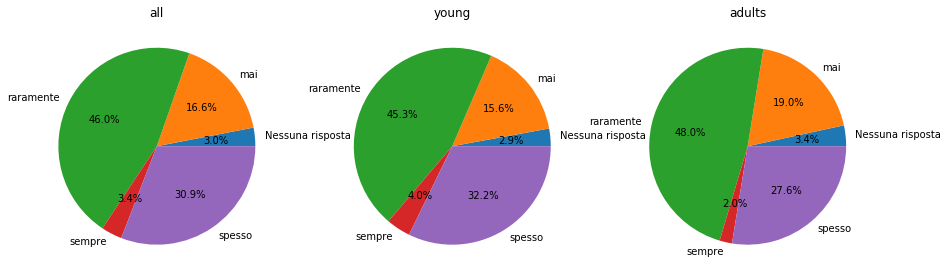

famiglia, amici più stretti                                                                                 209
Nessuna risposta                                                                                            200
amici più stretti                                                                                           128
famiglia, amici più stretti, gruppi con lo stesso interesse                                                  78
tutti, attraverso post pubblici                                                                              59
famiglia                                                                                                     53
amici più stretti, gruppi con lo stesso interesse                                                            51
gruppi con lo stesso interesse                                                                               34
famiglia, amici più stretti, conoscenti                                                                 

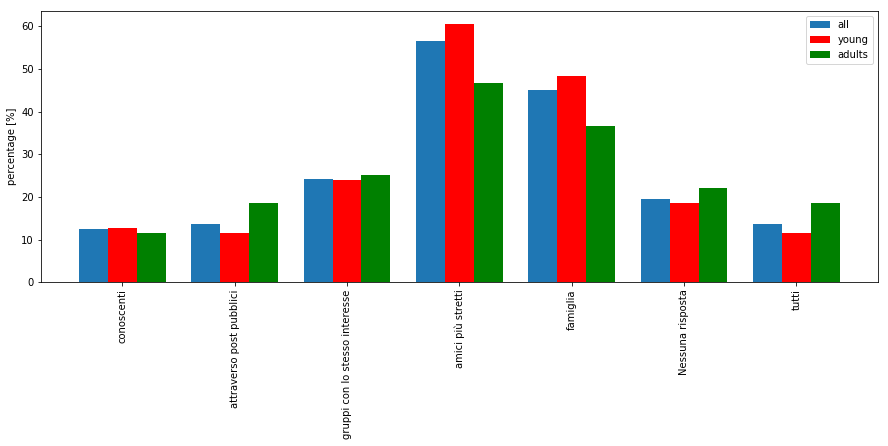

con un'app di messaggistica istantanea (whatsapp, SMS), ne parlo a voce                                              279
Nessuna risposta                                                                                                     210
ne parlo a voce                                                                                                      154
con un'app di messaggistica istantanea (whatsapp, SMS)                                                               143
con un'app di messaggistica istantanea (whatsapp, SMS), ne parlo a voce, postando e commentando sui social            55
postando e commentando sui social                                                                                     54
ne parlo a voce, postando e commentando sui social                                                                    45
con un'app di messaggistica istantanea (whatsapp, SMS), postando e commentando sui social                             36
altro                           

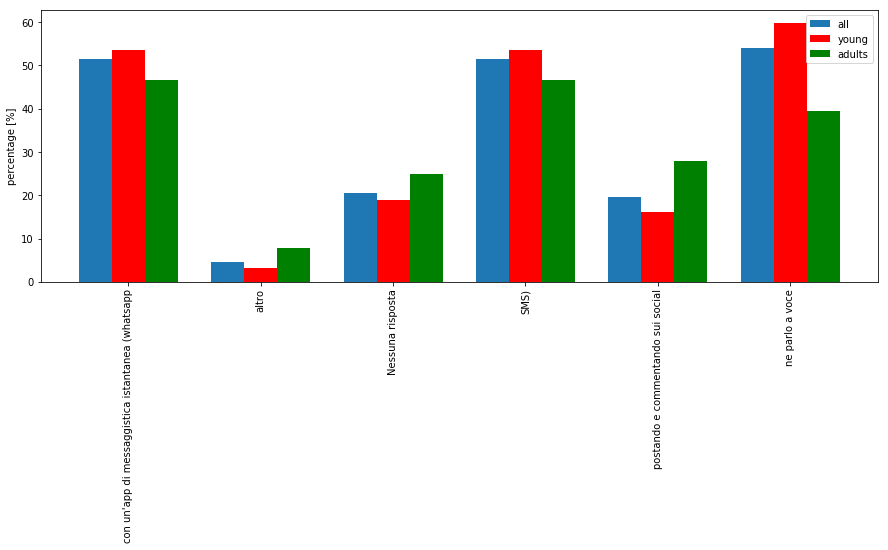

abbastanza          373
molto               372
Nessuna risposta    210
poco                 55
mai per questo       13
Name: Quando condividi lo fai ...  [Perché è una notizia che mi ha impressionato], dtype: int64


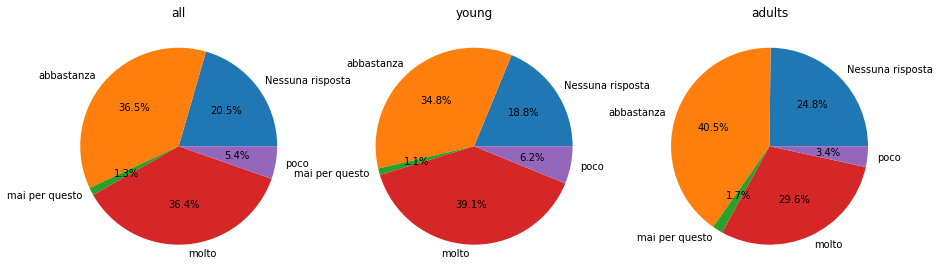

abbastanza          302
poco                265
Nessuna risposta    210
mai per questo      133
molto               113
Name: Quando condividi lo fai ...  [Per farlo sapere a tutti], dtype: int64


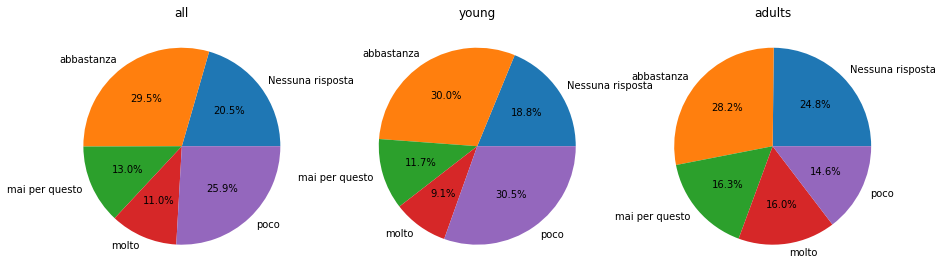

poco                284
abbastanza          281
Nessuna risposta    210
mai per questo      180
molto                68
Name: Quando condividi lo fai ...  [Per commentare], dtype: int64


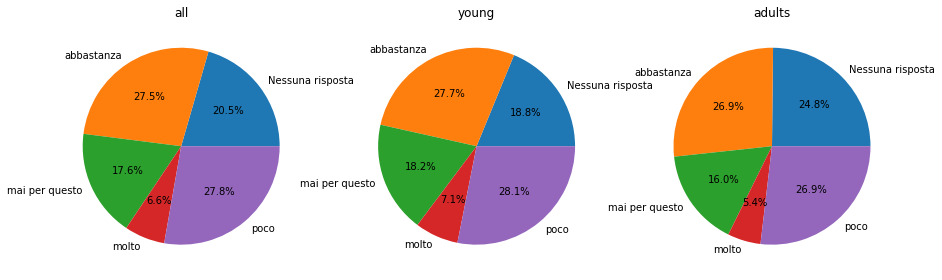

mai per questo      700
Nessuna risposta    210
poco                 92
abbastanza           15
molto                 6
Name: Quando condividi lo fai ...  [Perché lo fanno tutti], dtype: int64


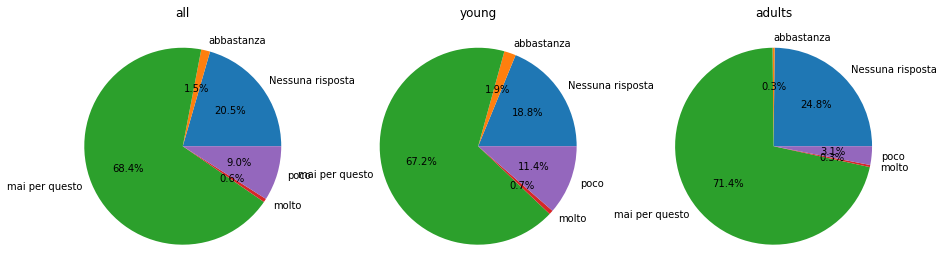

dipende dal giornale o dalla fonte    774
generalmente no                        96
generalmente si                        94
Nessuna risposta                       30
non saprei/non mi interessa            29
Name: Secondo te ci si può fidare di ciò che scrivono i giornalisti?, dtype: int64


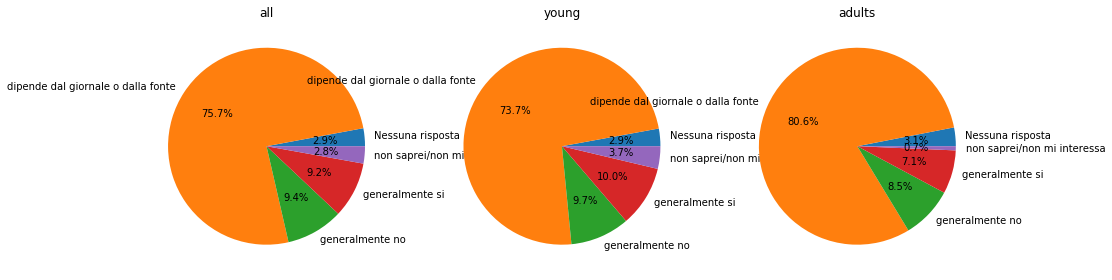

dipende dalla notizia          702
generalmente no                168
generalmente si                104
Nessuna risposta                30
non saprei/non mi interessa     19
Name: Secondo te ci si può fidare delle notizie che si trovano su internet?, dtype: int64


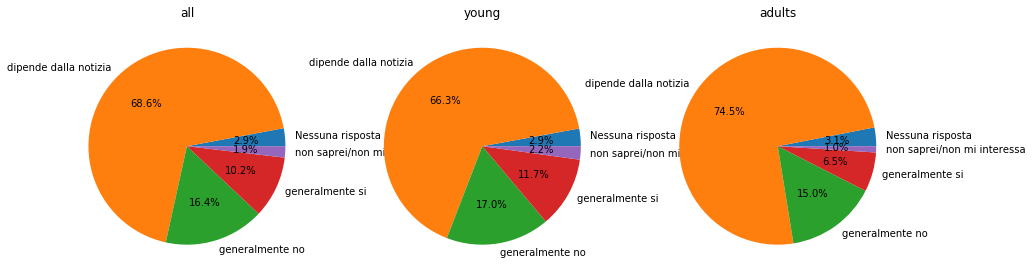

dipende             345
si                  345
no                  196
non lo so           107
Nessuna risposta     30
Name: Ritieni che esistano sistemi sicuri per capire con certezza se una notizia è vera o no?, dtype: int64


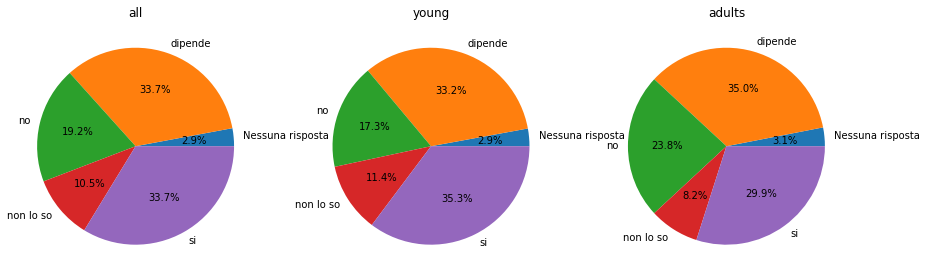

abbastanza          475
poco                300
molto               117
per niente          101
Nessuna risposta     30
Name: Cosa ti fa capire se una notizia è attendibile? [La notizia in sé, l'argomento che tratta], dtype: int64


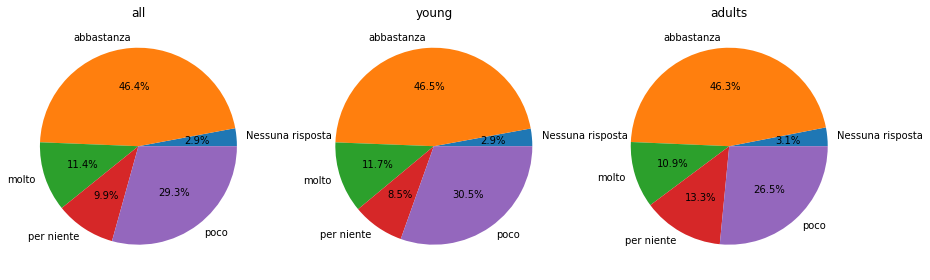

abbastanza          465
molto               408
poco                 95
Nessuna risposta     30
per niente           25
Name: Cosa ti fa capire se una notizia è attendibile? [Se riporta le fonti da cui è tratto l'argomento], dtype: int64


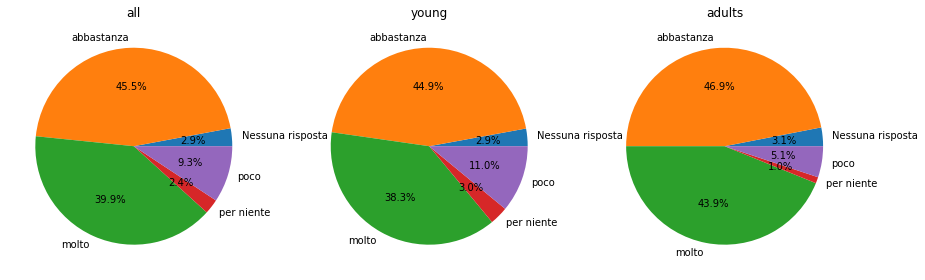

abbastanza          386
poco                360
per niente          126
molto               121
Nessuna risposta     30
Name: Cosa ti fa capire se una notizia è attendibile? [Il modo in cui è raccontata la notizia], dtype: int64


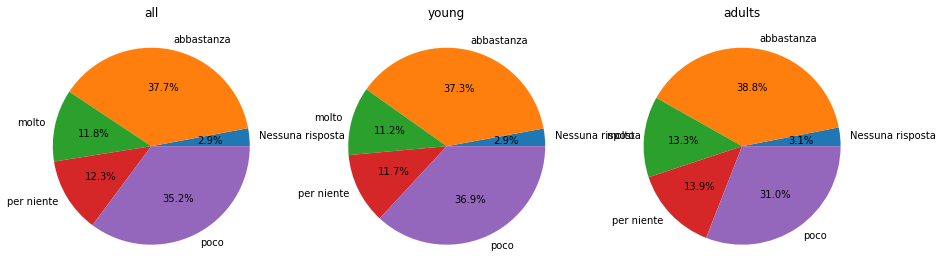

molto               447
abbastanza          420
poco                 99
Nessuna risposta     30
per niente           27
Name: Cosa ti fa capire se una notizia è attendibile? [La fonte che la pubblica (il sito, il giornale, il social)], dtype: int64


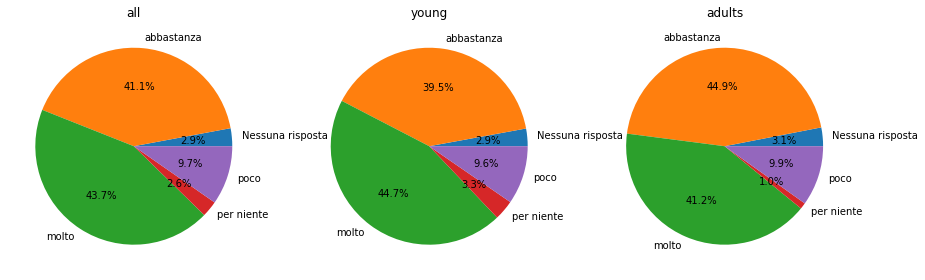

poco                422
abbastanza          290
per niente          223
molto                58
Nessuna risposta     30
Name: Cosa ti fa capire se una notizia è attendibile? [La forma e lo stile], dtype: int64


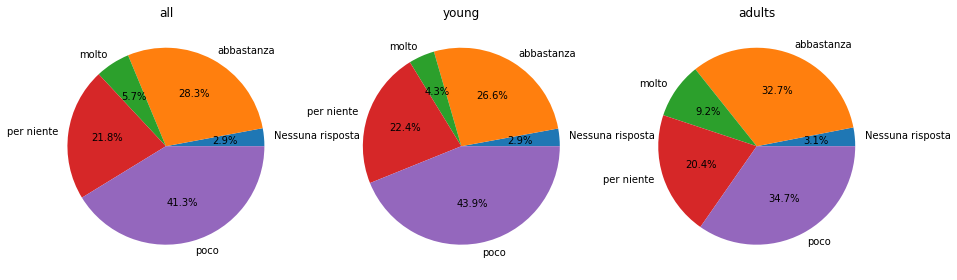

per niente          378
poco                328
abbastanza          201
molto                86
Nessuna risposta     30
Name: Cosa ti fa capire se una notizia è attendibile? [altro], dtype: int64


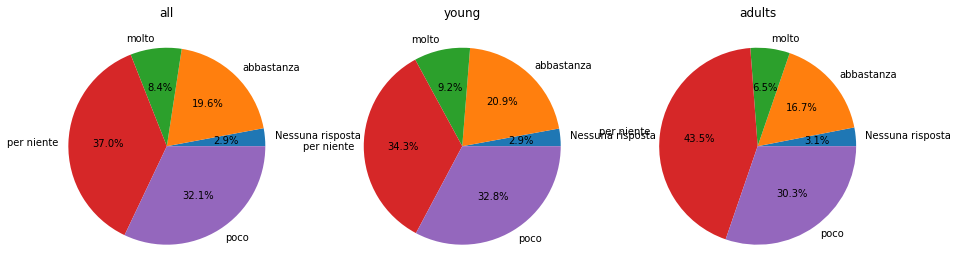

Facebook                                                                                                                                                               64
Facebook, messaggistica istantanea (whatsapp, messenger, instagram chat...)                                                                                            44
Facebook, blog e siti vari, messaggistica istantanea (whatsapp, messenger, instagram chat...)                                                                          40
Facebook, blog e siti vari                                                                                                                                             40
blog e siti vari                                                                                                                                                       33
Nessuna risposta                                                                                                                                      

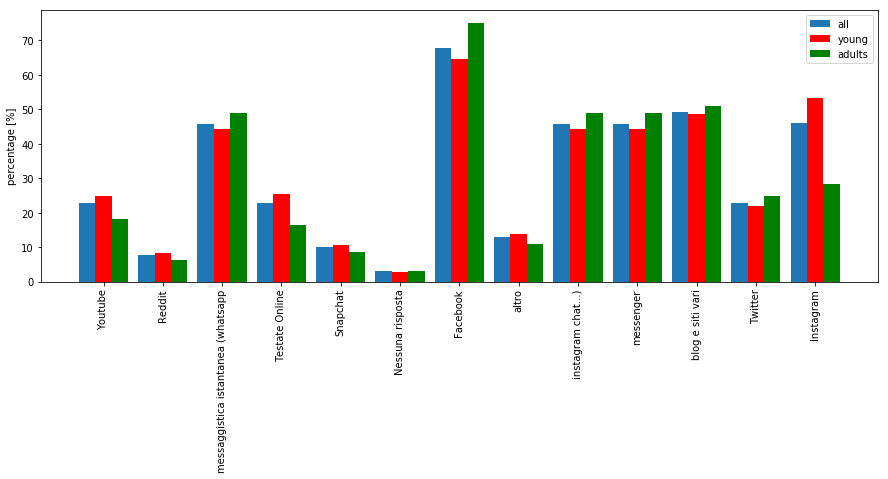

Notizie/cronaca/attualità                                                                                                             53
gossip                                                                                                                                35
Nessuna risposta                                                                                                                      30
Notizie/cronaca/attualità, gossip                                                                                                     30
Notizie/cronaca/attualità, politica, gossip                                                                                           27
Notizie/cronaca/attualità, politica                                                                                                   21
altro                                                                                                                                 21
politica                                 

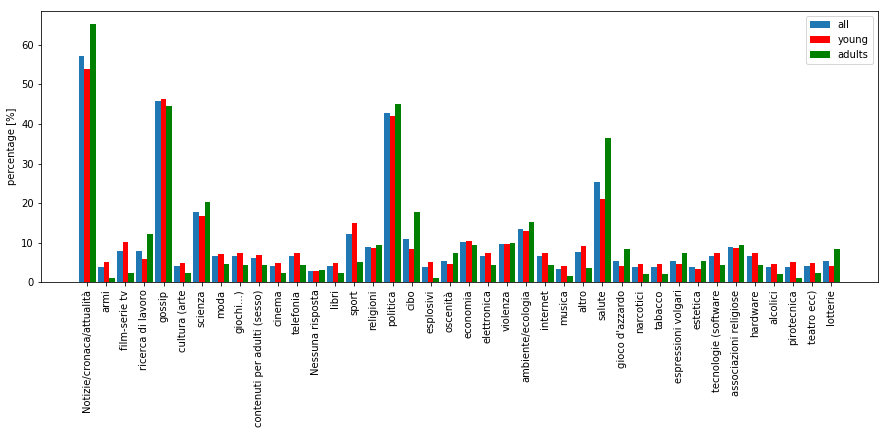

tra 15 e 20         286
tra 10 e 14         230
sopra i 50          159
tra 21 e 30         110
tra 41 e 50          96
tra 31 e 40          65
meno di 10 anni      47
Nessuna risposta     30
Name: Secondo te a che età si è più inclini a condividere una fake news?, dtype: int64


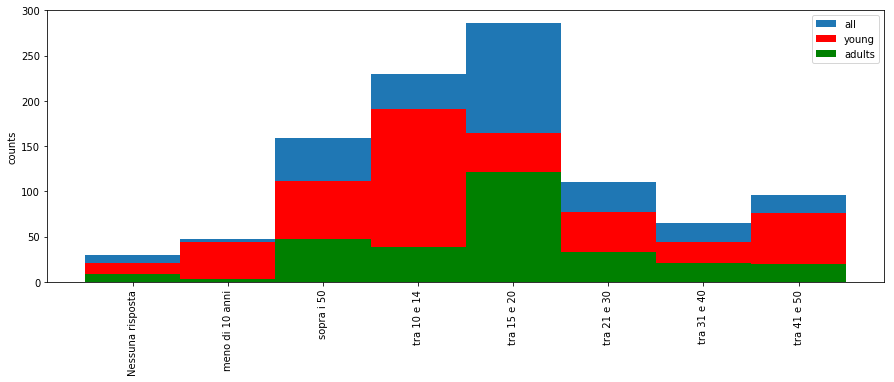

si                  496
no                  432
non mi interessa     65
Nessuna risposta     30
Name: Sai cos'è la reputazione digitale?, dtype: int64


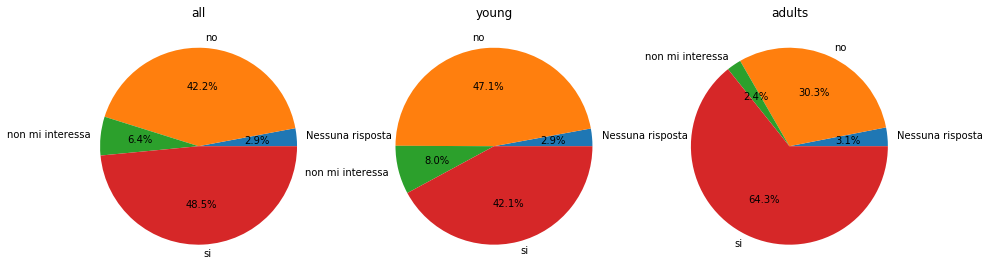

si                              878
lo so - ma non mi interessa      71
no                               36
Nessuna risposta                 30
non lo so e non mi interessa      8
Name: Sai quali pericoli potrebbero esserci nel postare le foto sui social?, dtype: int64


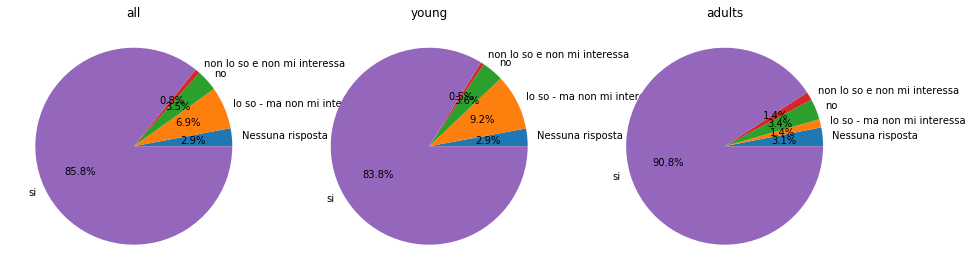

1    729
0    294
Name: young, dtype: int64


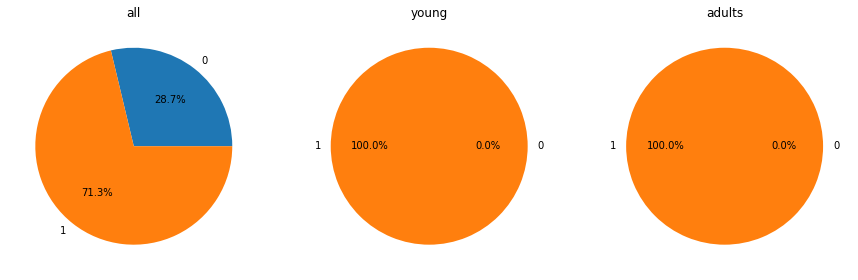

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
def multiple_choice(question, db):
  multiple_answar = db[question].str.split(',\s*').apply(lambda x: pd.Series(1,index=x)).fillna(0)
  labels=[]
  values=[]
  for i in range (0, len(multiple_answar.columns)):
    labels.append(multiple_answar.columns[i])
    values.append(multiple_answar[multiple_answar.columns[i]].sum())
  return values, labels

show_as_pie = 6
show_as_hist = 40

from sklearn.preprocessing import OrdinalEncoder
for i in range (1, len(df.columns)):
  print (df[df.columns[i]].value_counts())
  if np.max(df[df.columns[i]].astype(str).str.find(','))>-1:
    plt.figure(figsize=(15,5))
    values,labels = multiple_choice(question=df.columns[i], db=df)
    values_y,labels_y = multiple_choice(question=df.columns[i], db=young)
    values_o,labels_o = multiple_choice(question=df.columns[i], db=adults)
    # valori in percentule
    values   = np.array(values) * 100./len(df)
    values_y = np.array(values_y) * 100./len(young)
    values_o = np.array(values_o) * 100./len(adults)
    #
    all_lables = labels + labels_y + labels_o
    all_lables = list(set(all_lables))
    all_values=np.zeros(len(labels))
    all_values_y=np.zeros(len(all_lables))
    all_values_o=np.zeros(len(all_lables))
    for i in range(0, len(all_lables)):
      if all_lables[i] in labels:
        all_values[i] = values[labels.index(all_lables[i])]
      if all_lables[i] in labels_y:
        all_values_y[i] = values_y[labels_y.index(all_lables[i])]
      if all_lables[i] in labels_o:
        all_values_o[i] = values_o[labels_o.index(all_lables[i])]
    
    
    x = np.linspace(0,len(all_lables),len(all_lables))
    plt.bar(x-0.3, np.array(all_values), width=0.3, label='all')
    plt.bar(x, np.array(all_values_y), width=0.3, color='red', label='young')
    plt.bar(x+0.3, np.array(all_values_o), width=0.3, color='green', label='adults')
    plt.xticks(x, all_lables, rotation='vertical')
    plt.ylabel('percentage [%]')
    plt.legend()
  else:
    ordinal_encoder = OrdinalEncoder()
    ordinated_encoded = ordinal_encoder.fit_transform(df[[df.columns[i]]])
    ordinated_encoded_young = ordinated_encoded[df.young==1]
    ordinated_encoded_adults = ordinated_encoded[df.young==0]
    labels = np.array(ordinal_encoder.categories_[0])
    if len(ordinal_encoder.categories_[0])<show_as_pie :
      fig, ax = plt.subplots(1,3, figsize=(15, 5))
      val, _ = np.histogram(ordinated_encoded, bins=len(labels))
      ax[0].pie(val, labels=labels, autopct='%1.1f%%')
      ax[0].set_title('all')
      val, _ = np.histogram(ordinated_encoded_young, bins=len(labels))
      ax[1].pie(val, labels=labels, autopct='%1.1f%%')
      ax[1].set_title('young')
      val, _ = np.histogram(ordinated_encoded_adults, bins=len(labels))
      ax[2].pie(val, labels=labels, autopct='%1.1f%%')
      ax[2].set_title('adults')
    else:
      cat_num = np.linspace(1,len(ordinal_encoder.categories_[0]),len(ordinal_encoder.categories_[0]))
      if len(cat_num) > show_as_hist:
        cat_num = cat_num[::len(cat_num)//show_as_hist]
        labels = labels[::len(cat_num)//show_as_hist]
      plt.figure(figsize=(15,5))
      plt.hist(ordinated_encoded, range=(0,len(ordinal_encoder.categories_[0])), 
               bins=len(ordinal_encoder.categories_[0]), label='all')
      plt.hist(ordinated_encoded_young, range=(0,len(ordinal_encoder.categories_[0])), 
               bins=len(ordinal_encoder.categories_[0]), color='red', label='young')
      plt.hist(ordinated_encoded_adults, range=(0,len(ordinal_encoder.categories_[0])), 
               bins=len(ordinal_encoder.categories_[0]), color='green', label='adults')

      #labels = np.array(ordinal_encoder.categories_[0])
      #val0, _ = np.histogram(ordinated_encoded, bins=len(labels))
      #val1, _ = np.histogram(ordinated_encoded_young, bins=len(labels))
      #val2, _ = np.histogram(ordinated_encoded_adults, bins=len(labels))
      #x = np.matrix([val0, val1, val2]).T
      #ccolor = ['blue', 'green', 'red']
      #llables = ['all', 'young', 'red']
      #plt.hist(x, range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]), 
      #         density=True, histtype='bar', color=ccolor, label=llables)      
      ##x = np.linspace(0,len(labels),len(labels))
      ##val, _ = np.histogram(ordinated_encoded[:,0], bins=len(labels))
      ##plt.bar(x-0.3, val, width=0.3, label='all')
      ##val, _ = np.histogram(ordinated_encoded_young[:,0], bins=len(labels))
      ##plt.bar(x, val, width=0.3, color='red', label='young')
      ##val, _ = np.histogram(ordinated_encoded_adults[:,0], bins=len(labels))
      ##plt.bar(x+0.3, val, width=0.3, color='green', label='adults')

      plt.xticks(cat_num-0.5, labels, rotation='vertical')
      plt.ylabel('counts')
      plt.legend()
  plt.show()

# Look into data

In [0]:
df.info()

In [0]:
df.describe()

In [0]:
print(df['Cittadinanza'].value_counts())

# Info
jupyter notebook: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

selezionare elemeni in array o liste: https://teamtreehouse.com/community/how-do-i-get-the-first-4-and-last-4-items-of-a-list

machine leaenring https://medium.com/botsupply/il-machine-learning-%C3%A8-divertente-parte-1-97d4bce99a06



# GET dataset from local file with autentication




In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/
!ls "/content/drive/My Drive/Colab Notebooks"
import pandas as pd
csv_file = "/content/drive/My Drive/Colab Notebooks/_Be a Data Scientist a #IJF19 (Responses) - Form Responses 1.csv"
PROJECT_ROOT_DIR = "/content/drive/My Drive/Colab Notebooks/"
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
df = pd.read_csv(csv_file)
df.head()

# Example of dataset visualizzation

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
df['Sesso'].value_counts().plot(kind='pie')
plt.show()  
df['Sesso'].value_counts()


istogramma... 
l'ordine prescelto per una visulizzazione semplice e' in base a gli entries (che falsa la visulizzazione)

In [0]:
df['Età in anni compiuti'].value_counts().plot(kind='bar')
plt.show()  
 

data are index in ASCI oder and must be reindex 

In [0]:
ordine_eta = ['tra 11 e 14', 'tra 15 e 17', 'tra 18 e 19',
       'tra 20 e 24', 'tra 25 e 34', 'tra 35 e 44', 'tra 45 e 54',
       'tra 55 e 64', 'tra 65 e 74', '75 e oltre']
df['Età in anni compiuti'].value_counts().reindex(ordine_eta).plot(kind='bar')
plt.show() 

In [0]:
cat_eta = pd.Categorical(df['Età in anni compiuti'], 
                     categories=ordine_eta, 
                     ordered=True)
cat_eta.value_counts().plot(kind='bar')
plt.show()

per passarlo ad algorirmi di machine lenrning e' necessario indicizzarlo corretamente

In [0]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[ordine_eta])
eta_encoded = ordinal_encoder.fit_transform(df[['Età in anni compiuti']])

segue esempio di unsepevised machine lerning che separa in 2 cluster
dati raw

In [0]:
print(ordinal_encoder.categories_)
plt.hist(eta_encoded)
plt.show()

applichaimo una classificazione per capire le famiglie di dati separati in 2 cluster usando KMeans

In [0]:
from sklearn import cluster
import numpy as np
X = eta_encoded
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X)
#labels = dff.columns
labels = k_means.labels_
#plt.scatter(X[:,1], X[:,0], c=labels.astype(np.float))
plt.hist(X, range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]))
plt.hist(X[labels==0], range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]),color = 'r')
plt.xticks([0,1,2,3,4,5,6,7,8,9], ordine_eta, rotation='vertical')
plt.show()
print(ordinal_encoder.categories_[0])


campi con rispote multiple: esempio con il campo "Quali argomenti ti vengono suggeriti mentre sei online"

In [0]:
question='Quali argomenti ti vengono suggeriti mentre sei online'
question='Negli ultimi 12 mesi, quando hai cercato notizie, quanto tempo hai impiegato mediamente al giorno nella ricerca?'
df["multiple"]=df[question].str.find(',')
if np.max(df["multiple"])>-1:
  print (len(df[question].str.split(',\s*')))
np.max(df["multiple"])


-1

In [0]:
multiple_answar = df['Quali argomenti ti vengono suggeriti mentre sei online'].str.split(',\s*').apply(lambda x: pd.Series(1,index=x)).fillna(0)
multiple_answar.hist(figsize=(20,15))

plt.show()

In [0]:
labels=[]
values=[]
plt.figure(figsize=(10,5))
for i in range (1, len(multiple_answar.columns)):
  #print(multiple_answar.columns[i], multiple_answar[multiple_answar.columns[i]].sum())
  labels.append(multiple_answar.columns[i])
  values.append(multiple_answar[multiple_answar.columns[i]].sum()/len(df))
x = np.linspace(0,len(labels),len(labels))
plt.bar(x, np.array(values))
plt.xticks(x, labels, rotation='vertical')
plt.ylabel('percentage')
plt.show()

In [0]:
def plot_multiple_choice(question, db, fsize):
  %matplotlib inline
  import matplotlib.pyplot as plt
  multiple_answar = db[question].str.split(',\s*').apply(lambda x: pd.Series(1,index=x)).fillna(0)
  labels=[]
  values=[]
  plt.figure(figsize=fsize)
  for i in range (1, len(multiple_answar.columns)):
    labels.append(multiple_answar.columns[i])
    values.append(multiple_answar[multiple_answar.columns[i]].sum()/len(db))
  x = np.linspace(0,len(labels),len(labels))
  plt.bar(x, np.array(values))
  plt.xticks(x, labels, rotation='vertical')
  plt.ylabel('percentage [%]')
  plt.show()

plot_multiple_choice(question='Quali social usi di più per informarti?', db=df, fsize=(10,5))
